# **BLM463 Veri Madenciliğine Giriş dersi Dönem Projesi**

## Proje Açıklaması

Bu projede, ![Shill Bidding Dataset]([../dataset/shill_bidding_dataset.csv](https://archive.ics.uci.edu/dataset/562/shill+bidding+dataset)) üzerinde kapsamlı bir veri madenciliği çalışması gerçekleştirilmiştir. Çalışma, veri ön işleme adımlarından başlayarak, detaylı veri analizi ve görselleştirme ile devam etmiş, makine öğrenmesi modellerinin uygulanması ve performans değerlendirmesi ile sonuçlanmıştır. Özellikle Random Forest, SVM ve KNN gibi farklı sınıflandırma algoritmaları kullanılarak, sahte teklif veren kullanıcıların tespiti için etkili bir model geliştirilmiştir.

### 1. Kütüphane İçe Aktarımı
Projenin temel yapı taşlarını oluşturan Python kütüphanelerini içe aktarıyoruz:
- **Veri İşleme**: Pandas (veri analizi), NumPy (sayısal işlemler)
- **Görselleştirme**: Matplotlib ve Seaborn
- **Makine Öğrenmesi**: Scikit-learn (model eğitimi ve değerlendirme)
- **Sınıf Dengeleme**: SMOTE algoritması

In [1]:
import pandas as pd  # Veri çerçeveleri ve veri analizi araçları için
import numpy as np  # Sayısal hesaplamalar ve çok boyutlu diziler için
import matplotlib.pyplot as plt  # Temel görselleştirme için
import seaborn as sns  # Gelişmiş ve istatistiksel görselleştirme için
from sklearn.model_selection import train_test_split, GridSearchCV  # Veri bölme ve hiperparametre optimizasyonu için
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Veri ölçeklendirme ve etiket kodlama için
from sklearn.preprocessing import label_binarize # Etiketleri ikili formata dönüştürmek için
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Model performans metrikleri
from sklearn.metrics import confusion_matrix, classification_report  # Karmaşıklık matrisi ve sınıflandırma raporu
from sklearn.metrics import roc_curve, auc  # ROC eğrisi ve AUC hesaplaması için
from sklearn.ensemble import RandomForestClassifier  # Random Forest sınıflandırma modeli
from sklearn.svm import SVC  # SVM sınıflandırma modeli
from sklearn.neighbors import KNeighborsClassifier  # KNN sınıflandırma modeli
from imblearn.over_sampling import SMOTE  # Sınıf dengesizliğini gidermek için SMOTE algoritması

### 2. Veri Seti Yükleme ve İlk İnceleme
CSV formatındaki veri setini analiz ortamına dahil ediyoruz:
- Pandas ile veri okuma ve DataFrame oluşturma
- Veri seti boyut analizi (satır ve sütun sayıları)
- İlk 5 satırın incelenmesi ile genel yapı hakkında fikir edinme

In [2]:
df = pd.read_csv('../dataset/shill_bidding_dataset.csv')  # CSV dosyasından veriyi oku ve DataFrame oluştur
print("Veri seti boyutu:", df.shape)  # DataFrame'in satır ve sütun sayısını yazdır
print("\nİlk 5 satır:")  # Başlık
df.head()  # DataFrame'in ilk 5 satırını göster

Veri seti boyutu: (6321, 13)

İlk 5 satır:


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


### 3. Veri Seti Detaylı Analizi
Veri setinin temel özelliklerini detaylı şekilde inceliyoruz:
- Sütun isimlerinin listelenmesi
- Sayısal sütunlar için istatistiksel özet (ortalama, standart sapma, min, max)
- Eksik değer analizi ve temizlik planlaması

In [3]:
print("\nVeri seti sütunları:")  # Başlık
print(df.columns.tolist())  # Sütun isimlerini liste olarak yazdır
print("\nVeri seti istatistikleri:")  # Başlık
print(df.describe())  # Sayısal sütunların istatistiksel özetini yazdır
print("\nEksik değerler:")  # Başlık
print(df.isnull().sum())  # Her sütundaki eksik değer sayısını yazdır


Veri seti sütunları:
['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class']

Veri seti istatistikleri:
          Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
count   6321.000000  6321.000000      6321.000000    6321.000000   
mean    7535.829457  1241.388230         0.142541       0.127670   
std     4364.759137   735.770789         0.197084       0.131530   
min        1.000000     5.000000         0.000000       0.011765   
25%     3778.000000   589.000000         0.027027       0.043478   
50%     7591.000000  1246.000000         0.062500       0.083333   
75%    11277.000000  1867.000000         0.166667       0.166667   
max    15144.000000  2538.000000         1.000000       1.000000   

       Successive_Outbidding  Last_Bidding  Auction_Bids  \
count            6321.000000   6321.000000   6321.00000

### 4. Korelasyon Analizi
Sayısal değişkenler arasındaki ilişkileri inceliyoruz:
- Sayısal sütunlar arası korelasyon matrisi oluşturma
- Heatmap ile görselleştirme
- Pozitif/negatif ilişkilerin renk kodlaması ile analizi

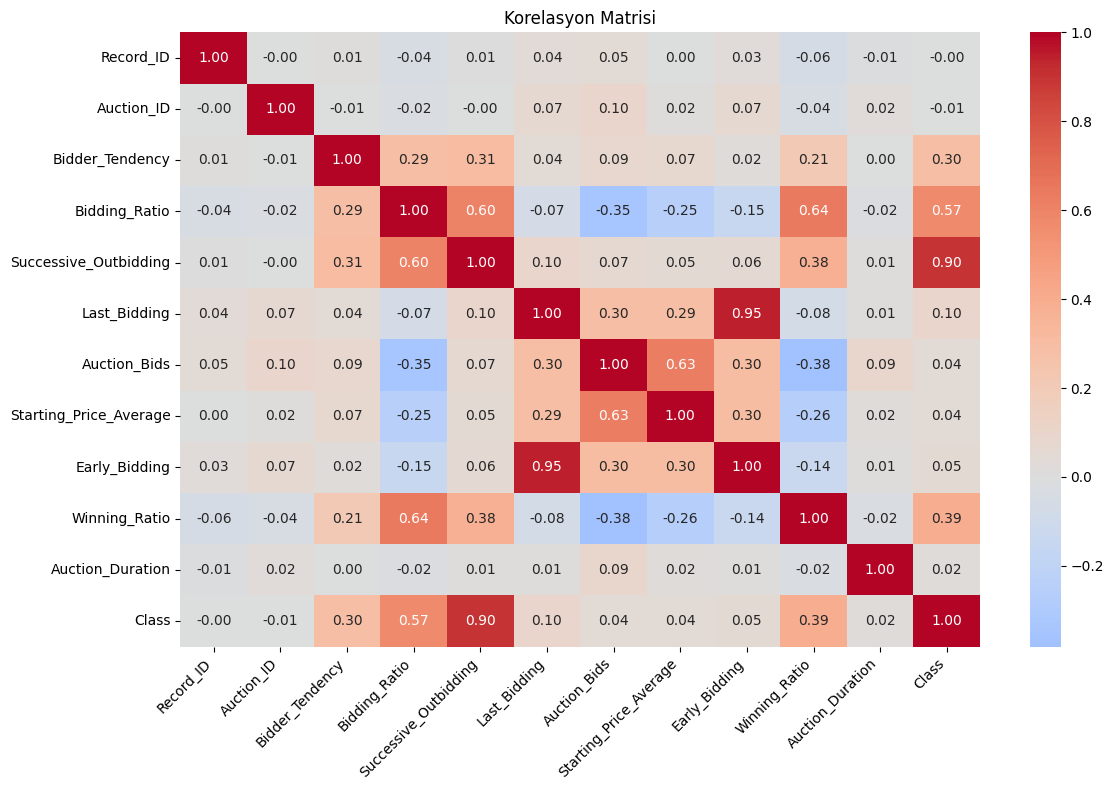

In [4]:
plt.figure(figsize=(12, 8))  # Grafik figürünün boyutunu ayarla
numeric_df = df.select_dtypes(include=[np.number])  # Sadece sayısal türdeki sütunları seç
correlation_matrix = numeric_df.corr()  # Sayısal sütunlar arasındaki korelasyon matrisini hesapla
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')  # Isı haritasını çizdir (değerleri göster, renk paletini ayarla)
plt.title('Korelasyon Matrisi')  # Grafiğe başlık ekle
plt.xticks(rotation=45, ha='right')  # X ekseni etiketlerini 45 derece döndür ve sağa hizala
plt.yticks(rotation=0)  # Y ekseni etiketlerini döndürme
plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat

### 5. Aykırı Değer Analizi
Sayısal değişkenlerin dağılımını ve aykırı değerleri inceliyoruz:
- Boxplot grafikleri ile dağılım analizi
- Medyan, çeyrek değerler ve aykırı gözlemlerin tespiti
- Veri temizliği ve normal dağılım uygunluğu değerlendirmesi

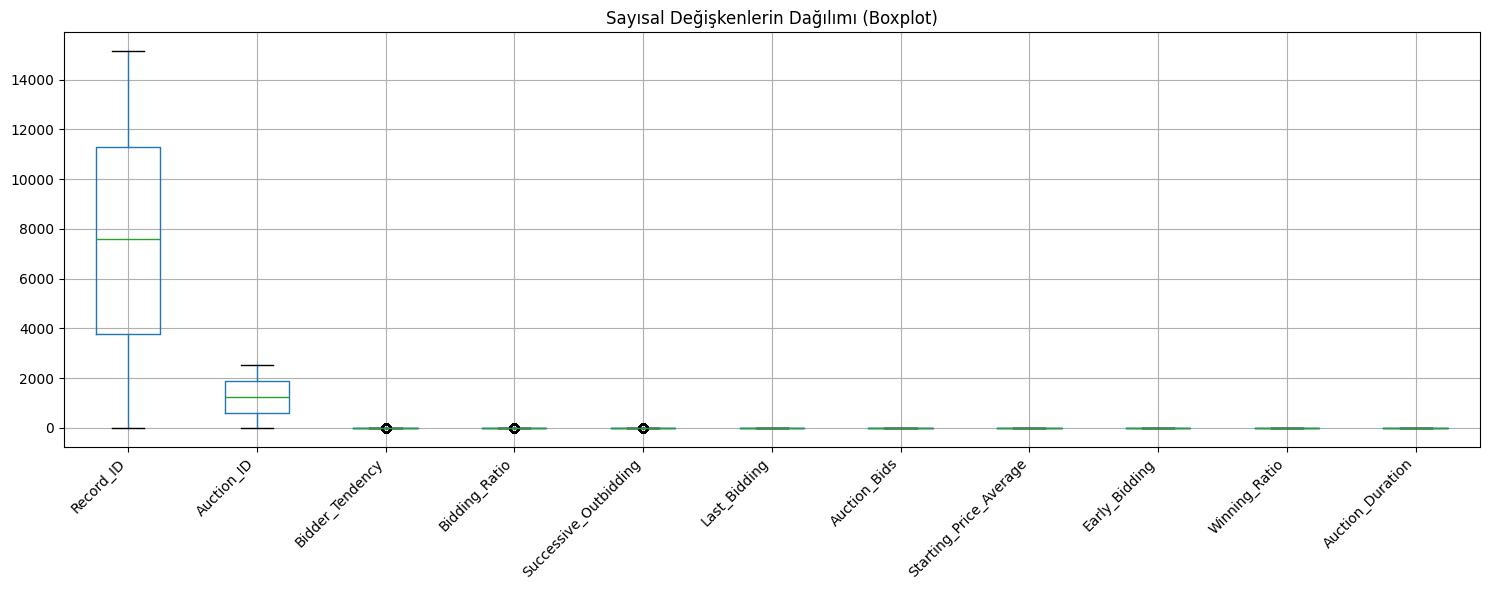

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Class')  # 'Class' sütunu hariç sayısal sütunları seç
plt.figure(figsize=(15, 6))  # Grafik figürünün boyutunu ayarla
df[numeric_cols].boxplot()  # Seçilen sayısal sütunlar için kutu grafiği oluştur
plt.title('Sayısal Değişkenlerin Dağılımı (Boxplot)')  # Grafiğe başlık ekle
plt.xticks(rotation=45, ha='right')  # X ekseni etiketlerini 45 derece döndür ve sağa hizala
plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat

### 6. Sınıf Bazlı Dağılım Analizi
Her sayısal değişkenin sınıf etiketlerine göre dağılımını inceliyoruz:
- Sınıf bazlı kutu grafikleri oluşturma
- Sahte ve gerçek kullanıcılar arasındaki dağılım farklarının analizi
- Ayrıştırıcı özelliklerin tespiti

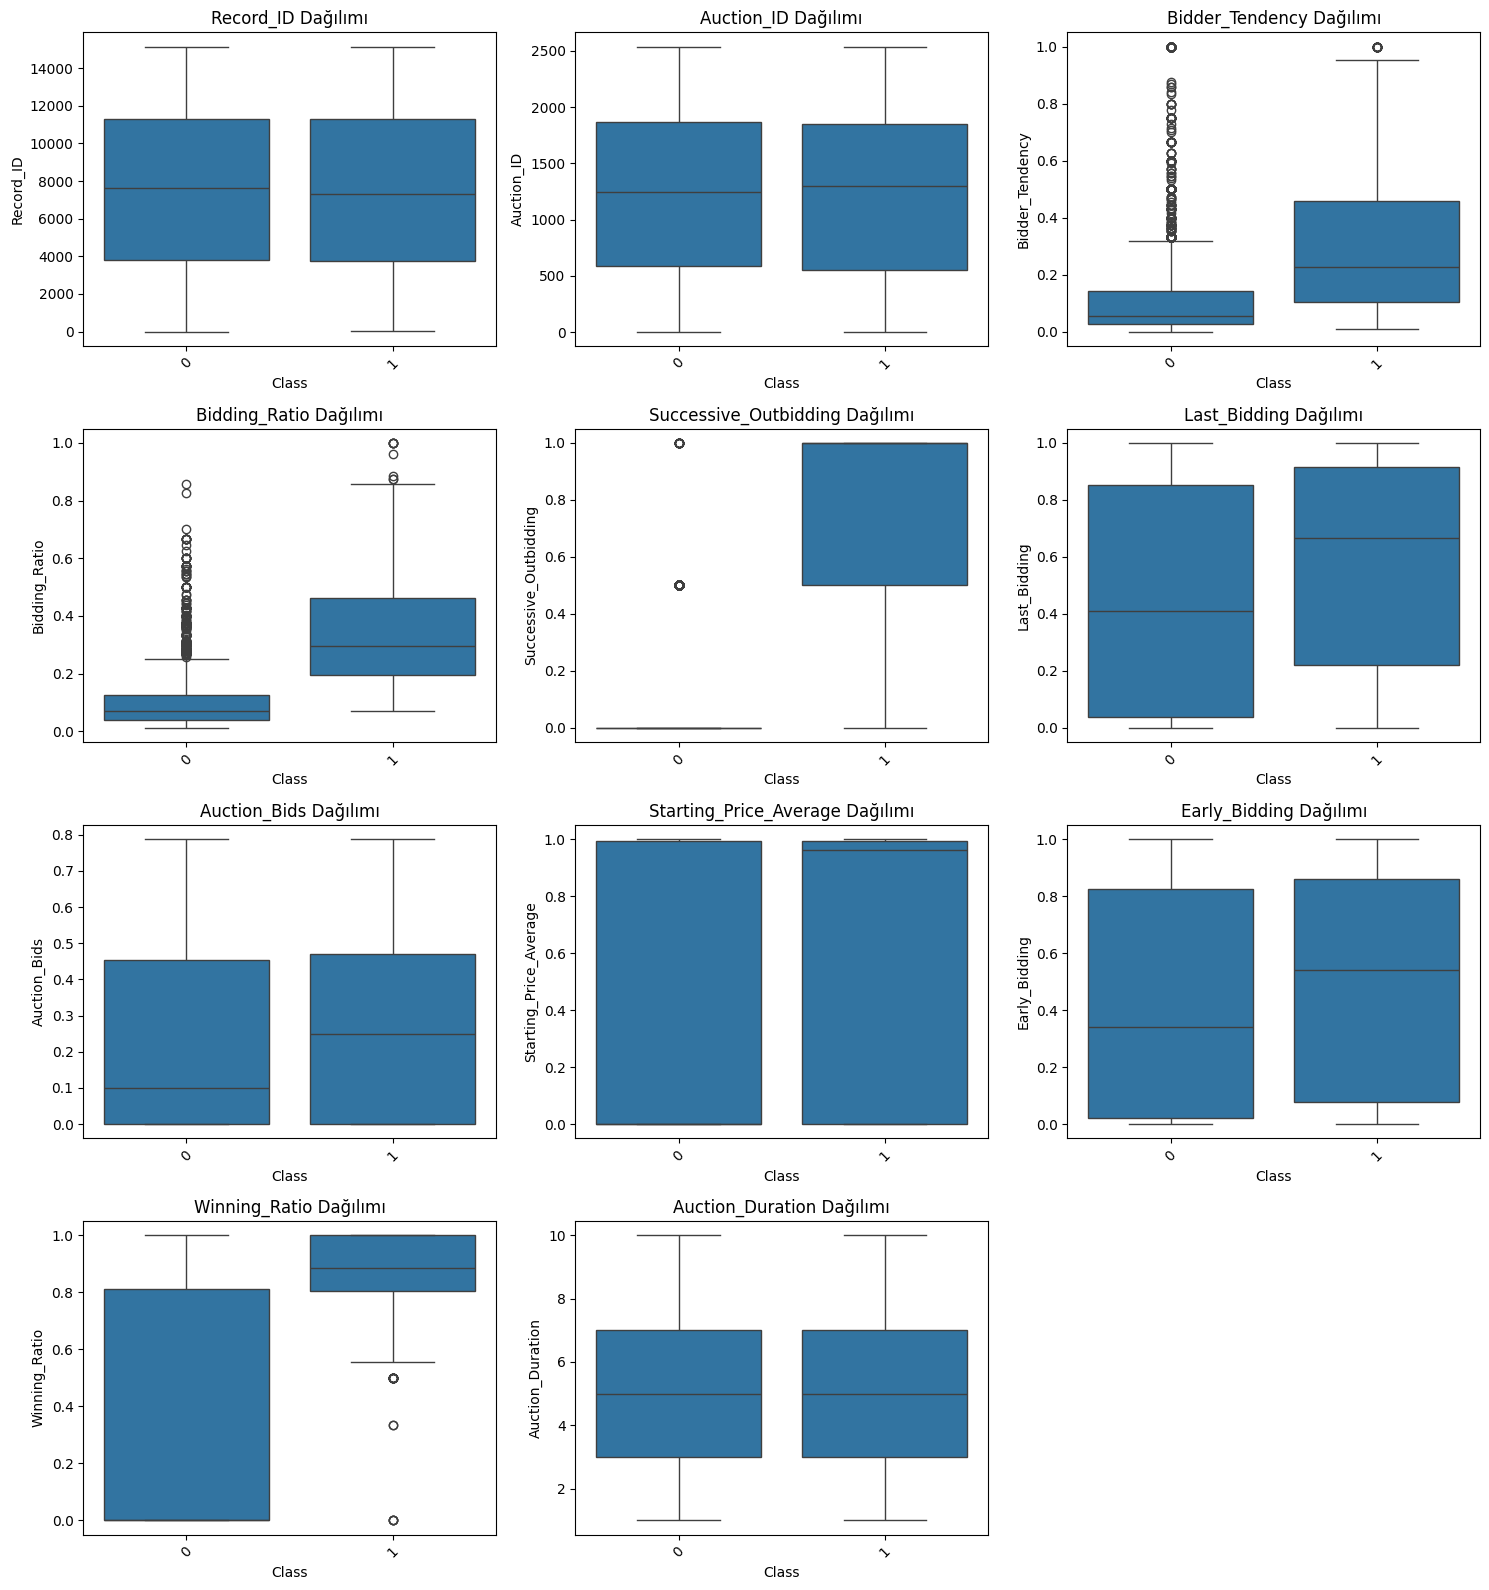

In [ ]:
n_cols = len(numeric_cols)  # Sayısal sütun sayısını al
n_rows = (n_cols + 2) // 3  # Alt grafikler için satır sayısını hesapla (her satırda 3 grafik olacak şekilde)
plt.figure(figsize=(15, 4 * n_rows))  # Grafik figürünün boyutunu satır sayısına göre ayarla
for i, col in enumerate(numeric_cols, 1):  # Her bir sayısal sütun için döngü başlat (indeks 1'den başlar)
    plt.subplot(n_rows, 3, i)  # Belirtilen satır, sütun ve pozisyonda bir alt grafik oluştur
    sns.boxplot(data=df, x='Class', y=col)  # 'Class' sütununa göre mevcut sayısal sütunun kutu grafiğini çiz
    plt.title(f'{col} Dağılımı')  # Alt grafiğe başlık ekle (sütun adıyla birlikte)
    plt.xticks(rotation=0)  # X ekseni etiketlerini 45 derece döndür
plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Tüm alt grafikleri içeren figürü göster
plt.close() # Grafik figürünü kapat

### 7. Hedef Değişken Analizi
Class sütununun dağılımını görselleştiriyoruz:
- Sınıf dağılımının çubuk grafik ile gösterimi
- Sınıf dengesizliği analizi
- Sayısal frekans değerlerinin grafik üzerinde gösterimi

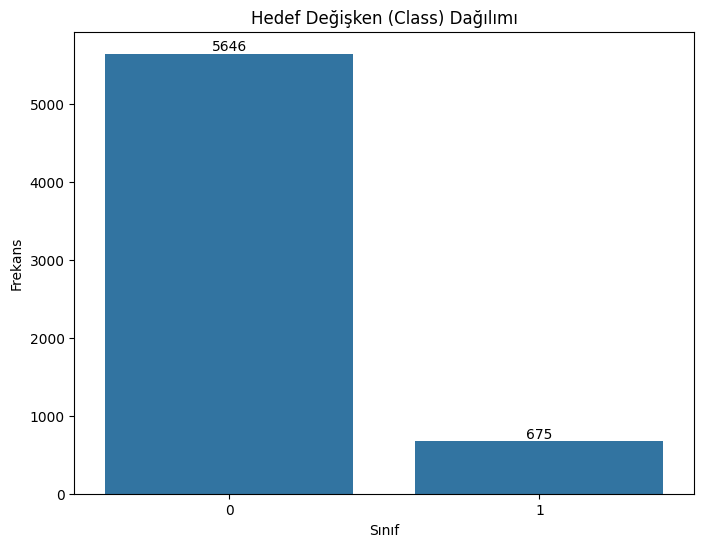

In [7]:
plt.figure(figsize=(8, 6))  # Grafik figürünün boyutunu ayarla
sns.countplot(data=df, x='Class')  # 'Class' sütununun değerlerinin sayısını gösteren çubuk grafik oluştur
plt.title('Hedef Değişken (Class) Dağılımı')  # Grafiğe başlık ekle
plt.xlabel('Sınıf')  # X eksenine etiket ekle
plt.ylabel('Frekans')  # Y eksenine etiket ekle
for i, count in enumerate(df['Class'].value_counts()):  # 'Class' sütunundaki her bir benzersiz değerin sayısı için döngü
    plt.text(i, count, str(count), ha='center', va='bottom')  # Çubukların üzerine sayıları yazdır
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat

### 8. Histogram Analizi
Sayısal değişkenlerin sınıf bazlı dağılımını histogramlarla inceliyoruz:
- Yığılmış histogramlar ile sınıf karşılaştırması
- Dağılım farklarının görsel analizi
- Model öğrenmesinde etkili özelliklerin belirlenmesi

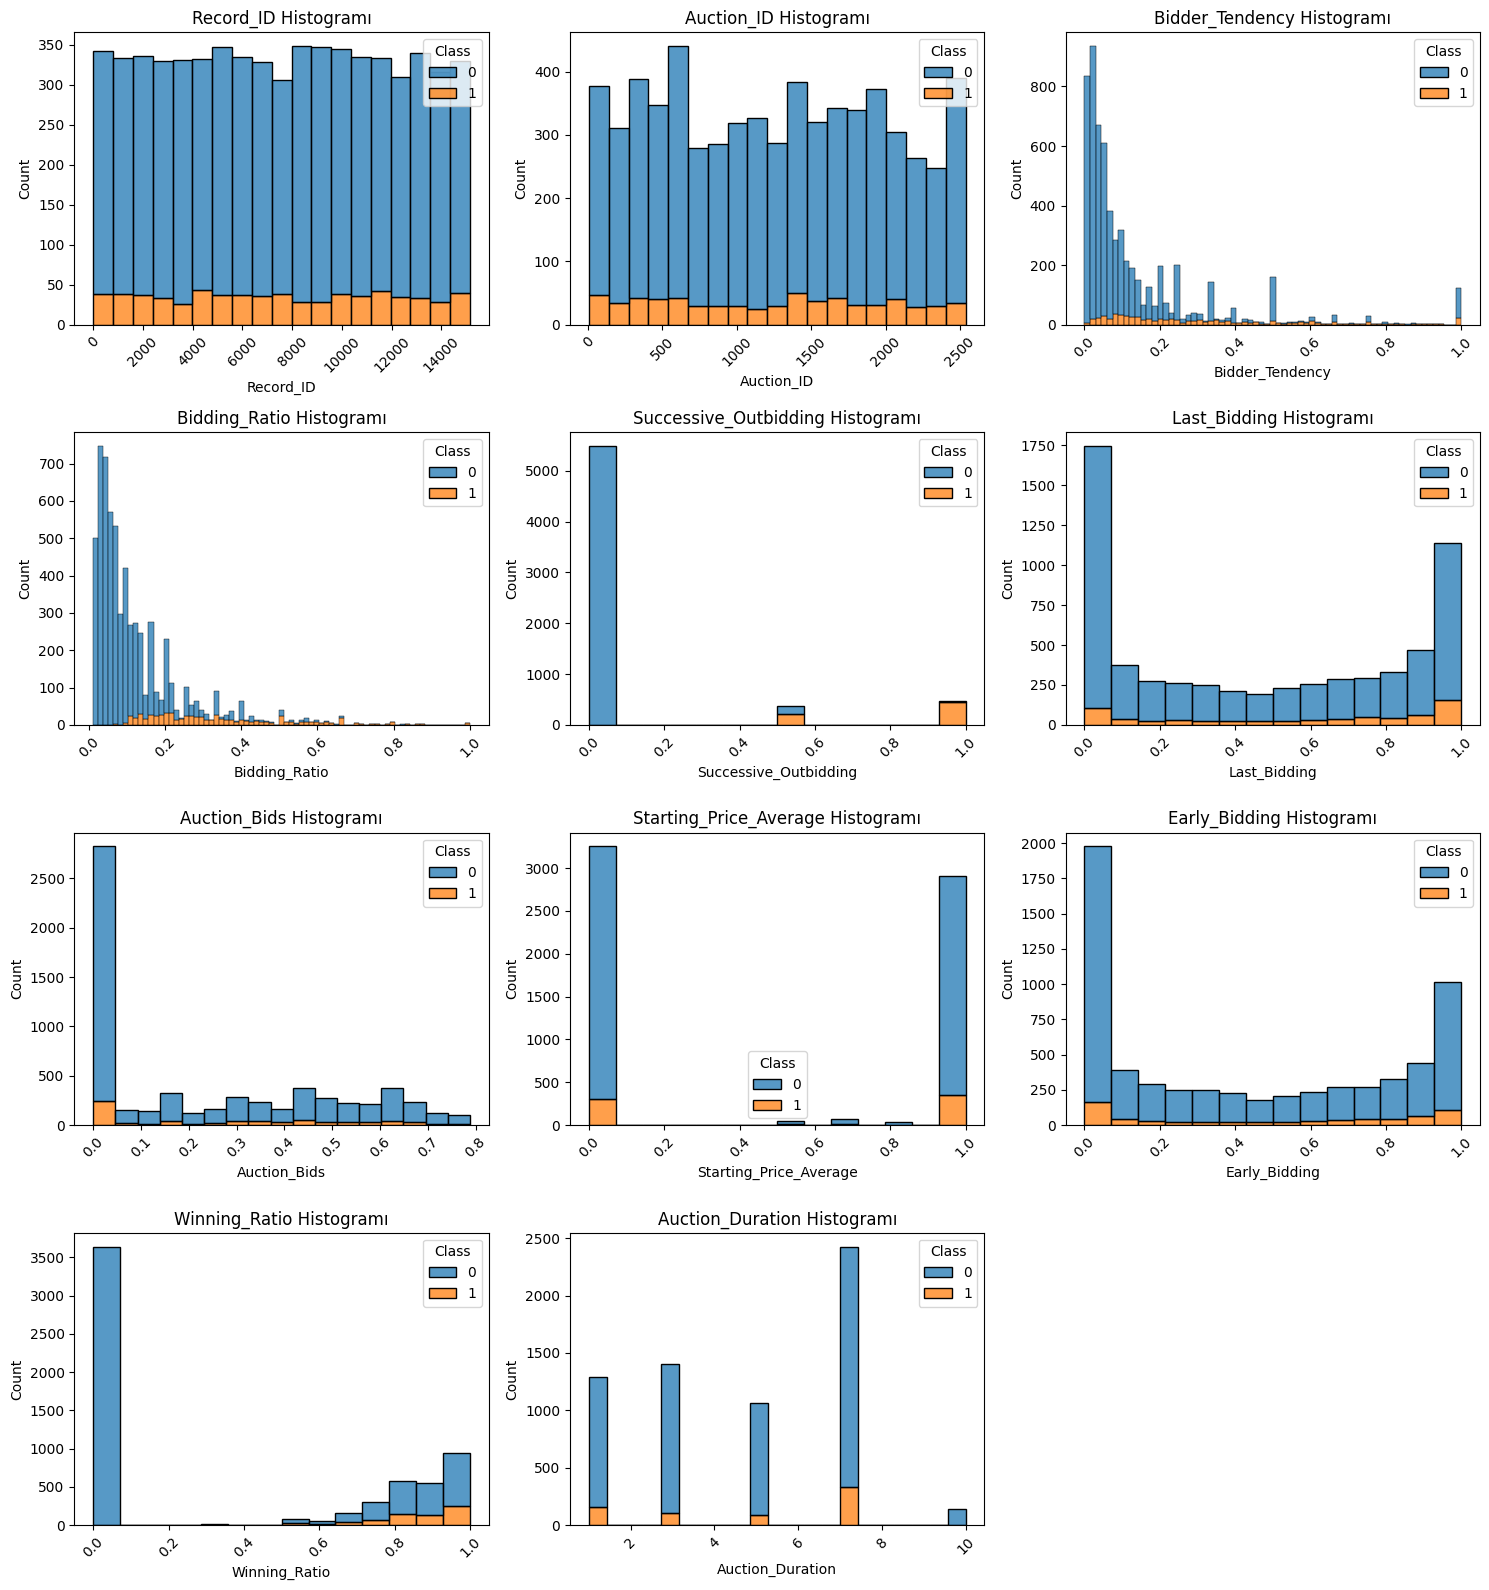

In [8]:
plt.figure(figsize=(15, 4 * n_rows))  # Grafik figürünün boyutunu daha önce hesaplanan satır sayısına göre ayarla
for i, col in enumerate(numeric_cols, 1):  # Her bir sayısal sütun için döngü başlat (indeks 1'den başlar)
    plt.subplot(n_rows, 3, i)  # Belirtilen satır, sütun ve pozisyonda bir alt grafik oluştur
    sns.histplot(data=df, x=col, hue='Class', multiple="stack")  # 'Class' sütununa göre mevcut sayısal sütunun yığılmış histogramını çiz
    plt.title(f'{col} Histogramı')  # Alt grafiğe başlık ekle (sütun adıyla birlikte)
    plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndür
plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Tüm alt grafikleri içeren figürü göster
plt.close() # Grafik figürünü kapat

### 9. Kategorik Değişken Dönüşümü
Kategorik değişkenleri sayısal forma dönüştürüyoruz:
- Bidder_ID ve Auction_ID sütunlarının LabelEncoder ile dönüştürülmesi
- Benzersiz kategorilere sayısal değer atama
- Dönüştürülmüş değişkenlerin doğrulama kontrolü

In [9]:
categorical_cols = ['Bidder_ID', 'Auction_ID']  # Sayısallaştırılacak kategorik sütunların listesi
le = LabelEncoder()  # LabelEncoder nesnesi oluştur
for col in categorical_cols:  # Belirtilen her bir kategorik sütun için döngü
    df[col] = le.fit_transform(df[col].astype(str))  # Sütunu stringe çevir ve ardından sayısal değerlere dönüştür
print("\nKategorik değişkenler sayısallaştırıldı.")  # İşlem tamamlandığında bilgilendirme mesajı
print("\nSayısallaştırılmış kategorik değişkenlerin ilk 5 satırı:")  # Başlık
print(df[categorical_cols].head())  # Sayısallaştırılmış sütunların ilk 5 satırını göster


Kategorik değişkenler sayısallaştırıldı.

Sayısallaştırılmış kategorik değişkenlerin ilk 5 satırı:
   Bidder_ID  Auction_ID
0        302         721
1        513         721
2        908         721
3        234         721
4       1053         769


### 10. Gereksiz Sütun Temizliği
Modelleme için anlamsız sütunları kaldırıyoruz:
- Record_ID sütununun çıkarılması
- Güncel sütun listesinin doğrulanması

In [10]:
if 'Record_ID' in df.columns:  # 'Record_ID' sütununun var olup olmadığını kontrol et
    df = df.drop('Record_ID', axis=1)  # Eğer varsa, 'Record_ID' sütununu kaldır (axis=1 sütun anlamına gelir)
    print("Record_ID sütunu kaldırıldı.")  # İşlem tamamlandığında bilgilendirme mesajı
print("\nGüncel sütunlar:")  # Başlık
print(df.columns.tolist())  # Güncel sütun isimlerini liste olarak yazdır

Record_ID sütunu kaldırıldı.

Güncel sütunlar:
['Auction_ID', 'Bidder_ID', 'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class']


### 11. Aykırı Değer İşleme
Winsorize yöntemi ile aykırı değerleri sınırlıyoruz:
- Alt ve üst yüzdelik değerlere göre sınırlama
- Aşırı uç değerlerin kırpılması
- Model sağlamlığının artırılması

In [11]:
def winsorize_series(s, lower=0.01, upper=0.99):  # Winsorize fonksiyonu tanımı: seriyi ve yüzdelik dilimleri alır
    return s.clip(lower=s.quantile(lower), upper=s.quantile(upper))  # Serideki değerleri belirtilen yüzdelik dilimler arasında kırpar

numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Class')  # 'Class' sütunu hariç sayısal sütunları seç
for col in numeric_cols:  # Seçilen her bir sayısal sütun için döngü
    df[col] = winsorize_series(df[col])  # Winsorize fonksiyonunu sütuna uygula
print("Aykırı değerler düzeltildi.")  # İşlem tamamlandığında bilgilendirme mesajı

Aykırı değerler düzeltildi.


### 12. Özellik Ölçeklendirme
Sayısal özellikleri StandardScaler ile ölçeklendiriyoruz:
- Ortalama 0, standart sapma 1 olacak şekilde dönüşüm
- Özelliklerin aynı ölçekte olmasının sağlanması
- İstatistiksel özet ile doğrulama

In [12]:
scaler = StandardScaler()  # StandardScaler nesnesi oluştur
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])  # Seçilen sayısal sütunları ölçeklendir (uygula ve dönüştür)
print("Özellikler ölçeklendirildi.")  # İşlem tamamlandığında bilgilendirme mesajı
print("\nÖlçeklendirilmiş değişkenlerin istatistikleri:")  # Başlık
print(df[numeric_cols].describe())  # Ölçeklendirilmiş sayısal sütunların istatistiksel özetini yazdır

Özellikler ölçeklendirildi.

Ölçeklendirilmiş değişkenlerin istatistikleri:
         Auction_ID     Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
count  6.321000e+03  6.321000e+03     6.321000e+03   6.321000e+03   
mean   4.383985e-17 -1.056653e-16    -2.641632e-17  -1.169063e-16   
std    1.000079e+00  1.000079e+00     1.000079e+00   1.000079e+00   
min   -1.725742e+00 -1.961450e+00    -7.233075e-01  -8.755266e-01   
25%   -8.338861e-01 -7.821152e-01    -5.861618e-01  -6.574578e-01   
50%   -2.348842e-03  4.414723e-02    -4.061580e-01  -3.426208e-01   
75%    8.808902e-01  8.194507e-01     1.224244e-01   3.156746e-01   
max    1.682268e+00  1.722151e+00     4.351084e+00   4.265447e+00   

       Successive_Outbidding  Last_Bidding  Auction_Bids  \
count           6.321000e+03  6.321000e+03  6.321000e+03   
mean            2.669734e-17  6.744592e-17  1.303954e-16   
std             1.000079e+00  1.000079e+00  1.000079e+00   
min            -3.710762e-01 -1.218517e+00 -9.074329e-01   
25

### 13. Yüksek Korelasyonlu Özelliklerin Tespiti
Özellikler arasındaki yüksek korelasyonu azaltıyoruz:
- Korelasyon matrisi hesaplama
- %95 eşik değerine göre yüksek korelasyonlu özelliklerin tespiti
- Çoklu bağlantı sorununu azaltma
- Hedef değişken ayrımı ve özellik matrisi oluşturma

In [13]:
def remove_highly_correlated_features(df, threshold=0.95):  # Yüksek korelasyonlu özellikleri kaldıran fonksiyon tanımı
    corr_matrix = df.corr().abs()  # Özellikler arasındaki mutlak korelasyon matrisini hesapla
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Korelasyon matrisinin üst üçgenini al (tekrarı önlemek için)
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]  # Eşik değerinden büyük korelasyona sahip sütunları bul
    return df.drop(to_drop, axis=1), to_drop  # Belirlenen sütunları kaldır ve kaldırılan sütun listesini döndür

x = df.drop('Class', axis=1)  # Hedef değişken ('Class') dışındaki tüm sütunları özellik matrisi (x) olarak ata
y = df['Class']  # Hedef değişkeni (y) ata
x, dropped_cols = remove_highly_correlated_features(x)  # Yüksek korelasyonlu özellikleri x matrisinden çıkar
if dropped_cols:  # Eğer kaldırılan sütun varsa
    print(f"Yüksek korelasyonlu sütunlar çıkarıldı: {dropped_cols}")  # Kaldırılan sütunların listesini yazdır
print("\nKalan özellikler:")  # Başlık
print(x.columns.tolist())  # Kalan özelliklerin (sütunların) listesini yazdır

Yüksek korelasyonlu sütunlar çıkarıldı: ['Early_Bidding']

Kalan özellikler:
['Auction_ID', 'Bidder_ID', 'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Winning_Ratio', 'Auction_Duration']


### 14. Veri Seti Bölme
Eğitim ve test setlerini oluşturuyoruz:
- %80 eğitim, %20 test oranında bölme
- random_state=42 ile tekrarlanabilirlik
- Sınıf dağılımının korunması (stratify)
- Set boyutlarının doğrulanması

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)  # Veriyi eğitim ve test setlerine böl
print("\nVeri eğitim ve test olarak bölündü.")  # İşlem tamamlandığında bilgilendirme mesajı
print(f"Eğitim seti boyutu: {X_train.shape}")  # Eğitim seti özellik matrisinin boyutunu yazdır
print(f"Test seti boyutu: {X_test.shape}")  # Test seti özellik matrisinin boyutunu yazdır


Veri eğitim ve test olarak bölündü.
Eğitim seti boyutu: (5056, 10)
Test seti boyutu: (1265, 10)


### 15. Sınıf Dengeleme
SMOTE algoritması ile sınıf dengesizliğini gideriyoruz:
- Azınlık sınıf örneklerinin çoğaltılması
- Eğitim verisinin dengelenmesi
- Sınıf dağılımlarının karşılaştırılması

In [15]:
smote = SMOTE(random_state=42)  # SMOTE nesnesi oluştur (tekrarlanabilirlik için random_state)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  # Eğitim verilerine SMOTE uygula (uygula ve yeniden örnekle)
print("\nSMOTE öncesi sınıf dağılımı (eğitim seti):")  # Başlık
print(y_train.value_counts())  # SMOTE öncesi eğitim seti hedef değişkeninin sınıf dağılımını yazdır
print("\nSMOTE sonrası sınıf dağılımı (eğitim seti):")  # Başlık
print(y_train_bal.value_counts())  # SMOTE sonrası (dengelenmiş) eğitim seti hedef değişkeninin sınıf dağılımını yazdır


SMOTE öncesi sınıf dağılımı (eğitim seti):
Class
0    4516
1     540
Name: count, dtype: int64

SMOTE sonrası sınıf dağılımı (eğitim seti):
Class
0    4516
1    4516
Name: count, dtype: int64


### 16. Model Değerlendirme Fonksiyonu
Kapsamlı model değerlendirme fonksiyonu tanımlıyoruz:
- Model eğitimi ve tahmin
- Performans metriklerinin hesaplanması
- Karmaşıklık matrisi ve sınıflandırma raporu
- ROC eğrisi ve AUC değeri
- Metrik sonuçlarının döndürülmesi

In [16]:
def evaluate_classification(model, x_train, x_test, y_train, y_test, model_name):  # Model değerlendirme fonksiyonu tanımı
    model.fit(x_train, y_train)  # Modeli eğitim verileriyle eğit
    y_pred = model.predict(x_test)  # Test verileri üzerinde tahmin yap
    
    accuracy = accuracy_score(y_test, y_pred)  # Doğruluk skorunu hesapla
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Ağırlıklı kesinlik skorunu hesapla (bölme hatası için 0 ata)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Ağırlıklı duyarlılık skorunu hesapla (bölme hatası için 0 ata)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Ağırlıklı F1 skorunu hesapla (bölme hatası için 0 ata)
    
    print(f"\n{model_name} Sonuçları:")  # Model adı ile başlık
    print(f"Doğruluk (Accuracy): {accuracy:.4f}")  # Doğruluk skorunu yazdır
    print(f"Kesinlik (Precision): {precision:.4f}")  # Kesinlik skorunu yazdır
    print(f"Duyarlılık (Recall): {recall:.4f}")  # Duyarlılık skorunu yazdır
    print(f"F1 Skoru: {f1:.4f}")  # F1 skorunu yazdır
    
    cm = confusion_matrix(y_test, y_pred)  # Karmaşıklık matrisini hesapla
    plt.figure(figsize=(8, 6))  # Grafik figürünün boyutunu ayarla
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Karmaşıklık matrisini ısı haritası olarak çizdir (değerleri göster, format 'd' - tamsayı)
    plt.title(f'Karmaşıklık Matrisi - {model_name}')  # Grafiğe başlık ekle
    plt.ylabel('Gerçek Etiket')  # Y eksenine etiket ekle
    plt.xlabel('Tahmin Edilen Etiket')  # X eksenine etiket ekle
    plt.show()  # Grafiği göster
    plt.close() # Grafik figürünü kapat
    
    print("\nSınıflandırma Raporu:")  # Başlık
    print(classification_report(y_test, y_pred, zero_division=0))  # Sınıflandırma raporunu yazdır (bölme hatası için 0 ata)
    
    if len(np.unique(y_test)) == 2:  # Eğer hedef değişken ikili sınıflandırma ise (2 benzersiz değer)
        if hasattr(model, "predict_proba"):  # Modelin olasılık tahmini yapma yeteneği varsa
            y_score = model.predict_proba(x_test)[:, 1]  # Pozitif sınıf için olasılıkları al
        else:  # Modelin karar fonksiyonu varsa (örn. SVM)
            y_score = model.decision_function(x_test)  # Karar fonksiyonu skorlarını al
        
        fpr, tpr, _ = roc_curve(y_test, y_score)  # False Positive Rate (FPR) ve True Positive Rate (TPR) hesapla
        roc_auc = auc(fpr, tpr)  # ROC eğrisi altındaki alanı (AUC) hesapla

        plt.figure()  # Yeni bir grafik figürü oluştur
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')  # ROC eğrisini çiz
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisini çiz (referans)
        plt.xlim([0.0, 1.0])  # X ekseni sınırlarını ayarla
        plt.ylim([0.0, 1.05])  # Y ekseni sınırlarını ayarla
        plt.xlabel('False Positive Rate')  # X eksenine etiket ekle
        plt.ylabel('True Positive Rate')  # Y eksenine etiket ekle
        plt.title(f'ROC Eğrisi - {model_name}')  # Grafiğe başlık ekle
        plt.legend(loc="lower right")  # Göstergeyi sağ alt köşeye yerleştir
        plt.grid(True)  # Grafiğe ızgara ekle
        plt.show()  # Grafiği göster
        plt.close() # Grafik figürünü kapat

    return accuracy, precision, recall, f1  # Hesaplanan metrikleri döndür

### 17. Model Eğitimi ve Testi
Farklı sınıflandırma modellerini eğitiyoruz:
- Random Forest (ensemble tabanlı)
- SVM (Destek Vektör Makineleri)
- KNN (K-En Yakın Komşular)
- SMOTE ile dengelenmiş veri kullanımı
- Kapsamlı performans analizi


Normal modelleme başlıyor...

Random Forest Sonuçları:
Doğruluk (Accuracy): 0.9968
Kesinlik (Precision): 0.9969
Duyarlılık (Recall): 0.9968
F1 Skoru: 0.9968


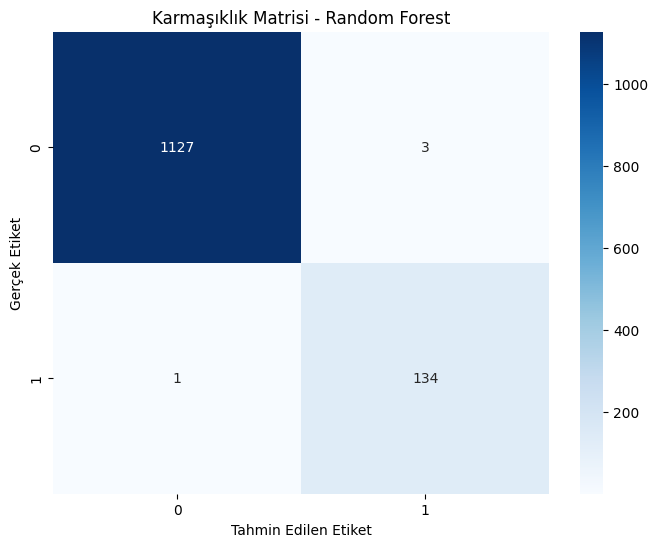


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       0.98      0.99      0.99       135

    accuracy                           1.00      1265
   macro avg       0.99      0.99      0.99      1265
weighted avg       1.00      1.00      1.00      1265



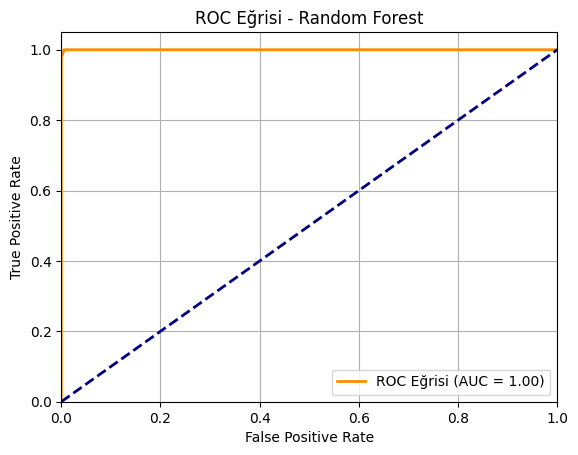


SVM Sonuçları:
Doğruluk (Accuracy): 0.9818
Kesinlik (Precision): 0.9845
Duyarlılık (Recall): 0.9818
F1 Skoru: 0.9824


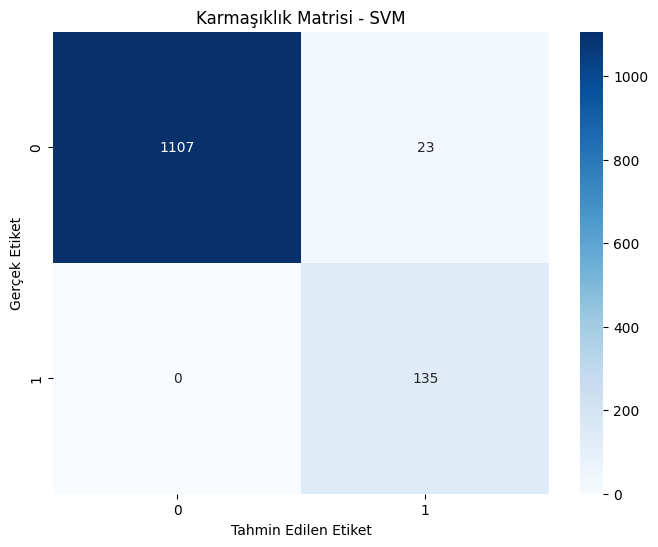


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1130
           1       0.85      1.00      0.92       135

    accuracy                           0.98      1265
   macro avg       0.93      0.99      0.96      1265
weighted avg       0.98      0.98      0.98      1265



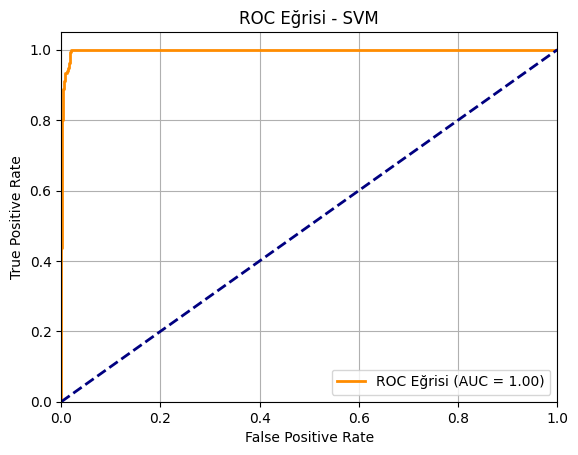


KNN Sonuçları:
Doğruluk (Accuracy): 0.9834
Kesinlik (Precision): 0.9851
Duyarlılık (Recall): 0.9834
F1 Skoru: 0.9838


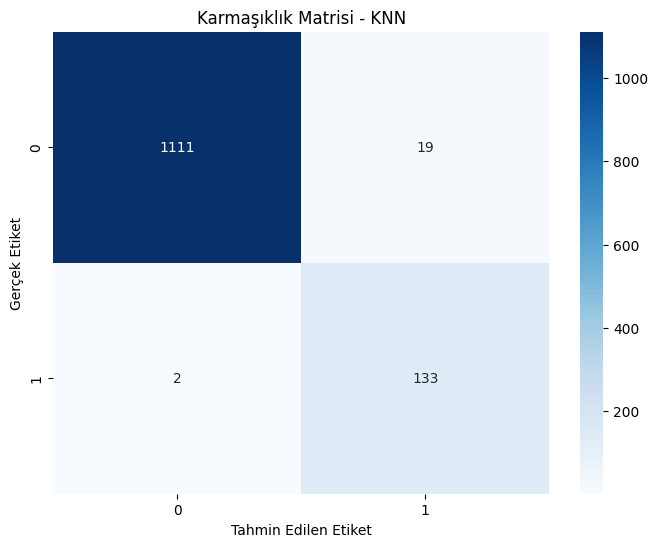


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1130
           1       0.88      0.99      0.93       135

    accuracy                           0.98      1265
   macro avg       0.94      0.98      0.96      1265
weighted avg       0.99      0.98      0.98      1265



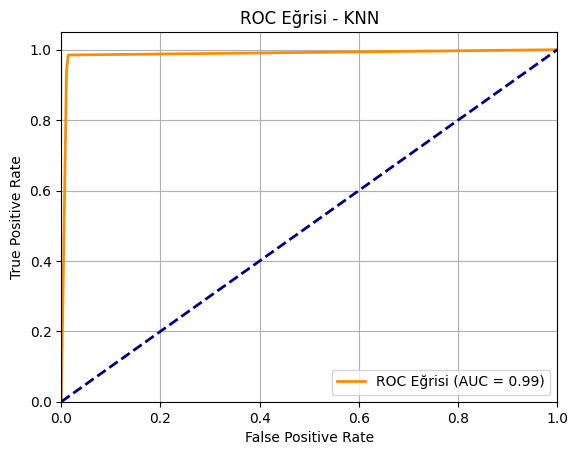

In [17]:
print("\nNormal modelleme başlıyor...")  # Modelleme sürecinin başladığını belirten mesaj

rf_model = RandomForestClassifier(random_state=42)  # Random Forest modelini varsayılan parametreler ve random_state ile oluştur
rf_results = evaluate_classification(rf_model, X_train_bal, X_test, y_train_bal, y_test, 'Random Forest')  # Random Forest modelini değerlendir

svm_model = SVC(random_state=42, probability=True)  # SVM modelini varsayılan parametreler, random_state ve olasılık tahmini aktif olacak şekilde oluştur
svm_results = evaluate_classification(svm_model, X_train_bal, X_test, y_train_bal, y_test, 'SVM')  # SVM modelini değerlendir

knn_model = KNeighborsClassifier()  # KNN modelini varsayılan parametrelerle oluştur
knn_results = evaluate_classification(knn_model, X_train_bal, X_test, y_train_bal, y_test, 'KNN')  # KNN modelini değerlendir

### 18. Model Performans Görselleştirmesi
Modellerin performans metriklerini görselleştiriyoruz:
- Veri yapısı oluşturma
- Çoklu çubuk grafik tasarımı
- Grafik özelleştirme
- Değer etiketleme
- Bellek yönetimi

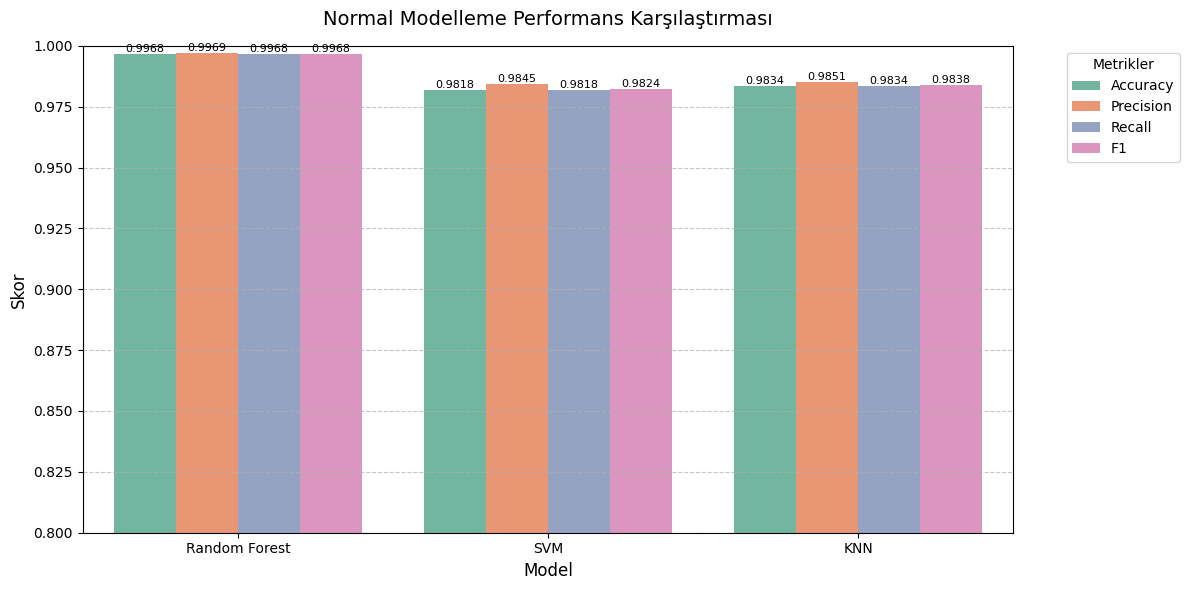

In [18]:
normal_data = {  # Görselleştirme için veri sözlüğü oluştur
    'Model': ['Random Forest', 'SVM', 'KNN'] * 4,  # Model isimleri (her metrik için tekrarlanır)
    'Metrik': ['Accuracy'] * 3 + ['Precision'] * 3 + ['Recall'] * 3 + ['F1'] * 3,  # Metrik isimleri
    'Değer': [  # İlgili metrik değerleri
        rf_results[0], svm_results[0], knn_results[0],  # Doğruluk değerleri
        rf_results[1], svm_results[1], knn_results[1],  # Kesinlik değerleri
        rf_results[2], svm_results[2], knn_results[2],  # Duyarlılık değerleri
        rf_results[3], svm_results[3], knn_results[3]   # F1 skoru değerleri
    ]
}

normal_df = pd.DataFrame(normal_data)  # Veri sözlüğünden Pandas DataFrame oluştur

plt.figure(figsize=(12, 6))  # Grafik figürünün boyutunu ayarla
sns.barplot(data=normal_df, x='Model', y='Değer', hue='Metrik', palette='Set2')  # Çubuk grafik çiz (modele göre, değere göre, metriklerle renklendir)
plt.title('Normal Modelleme Performans Karşılaştırması', fontsize=14, pad=15)  # Grafiğe başlık ekle
plt.xlabel('Model', fontsize=12)  # X eksenine etiket ekle
plt.ylabel('Skor', fontsize=12)  # Y eksenine etiket ekle
plt.ylim(0.8, 1.0)  # Y ekseni sınırlarını ayarla (daha iyi karşılaştırma için)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y eksenine yatay ızgara çizgileri ekle
plt.legend(title='Metrikler', bbox_to_anchor=(1.05, 1), loc='upper left')  # Göstergeyi grafiğin dışına sağ üste yerleştir

for p in plt.gca().patches:  # Grafikteki her bir çubuk (patch) için döngü
    plt.gca().annotate(f'{p.get_height():.4f}',  # Çubuğun yüksekliğini (değerini) formatlayarak yazdır
                       (p.get_x() + p.get_width() / 2., p.get_height()),  # Metnin konumunu ayarla (çubuğun ortası, üstü)
                       ha='center', va='bottom', fontsize=8)  # Metni hizala ve font boyutunu ayarla

plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat


### 19. GridSearchCV Optimizasyonu
Model hiperparametrelerini optimize ediyoruz:
- Parametre ızgaralarının tanımlanması
- 5 katlı çapraz doğrulama
- F1-weighted optimizasyon metriği
- En iyi parametrelerin raporlanması


GridSearchCV ile model optimizasyonu başlıyor...

Random Forest için GridSearchCV başlatılıyor...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Random Forest için en iyi parametreler:
{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
En iyi cross-validation skoru: 0.9975

SVM için GridSearchCV başlatılıyor...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

SVM için en iyi parametreler:
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
En iyi cross-validation skoru: 0.9975

KNN için GridSearchCV başlatılıyor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

KNN için en iyi parametreler:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
En iyi cross-validation skoru: 0.9922

Optimized Random Forest Sonuçları:
Doğruluk (Accuracy): 0.9976
Kesinlik (Precision): 0.9976
Duyarlılık (Recall): 0.9976
F1 Skoru: 0.9976


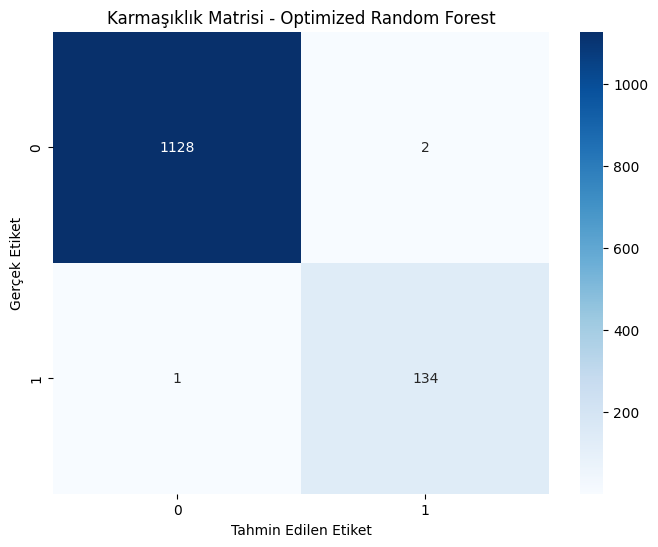


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       0.99      0.99      0.99       135

    accuracy                           1.00      1265
   macro avg       0.99      1.00      0.99      1265
weighted avg       1.00      1.00      1.00      1265



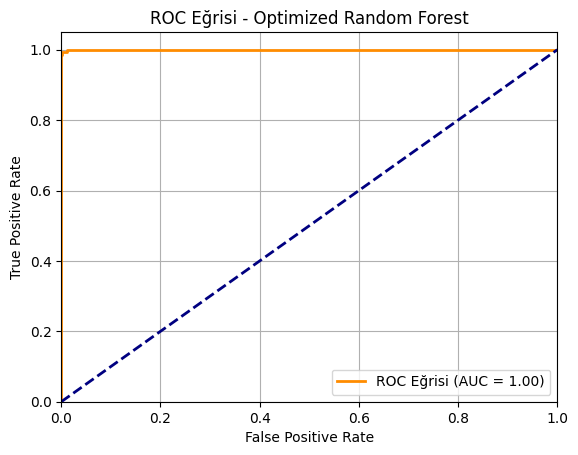


Optimized SVM Sonuçları:
Doğruluk (Accuracy): 0.9921
Kesinlik (Precision): 0.9924
Duyarlılık (Recall): 0.9921
F1 Skoru: 0.9922


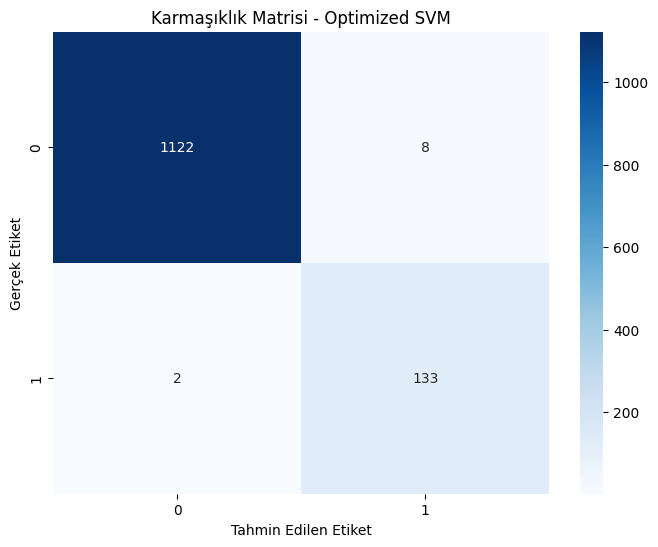


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1130
           1       0.94      0.99      0.96       135

    accuracy                           0.99      1265
   macro avg       0.97      0.99      0.98      1265
weighted avg       0.99      0.99      0.99      1265



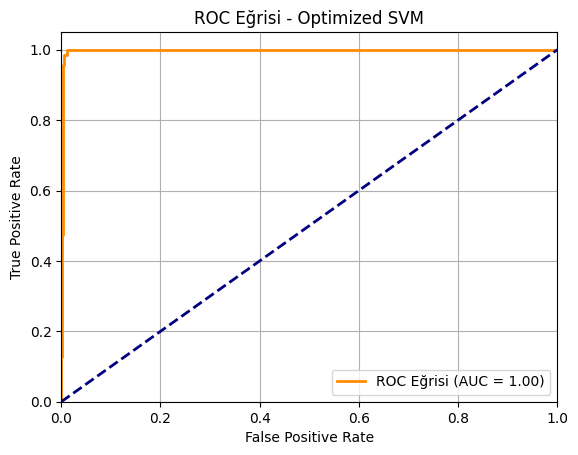


Optimized KNN Sonuçları:
Doğruluk (Accuracy): 0.9826
Kesinlik (Precision): 0.9842
Duyarlılık (Recall): 0.9826
F1 Skoru: 0.9830


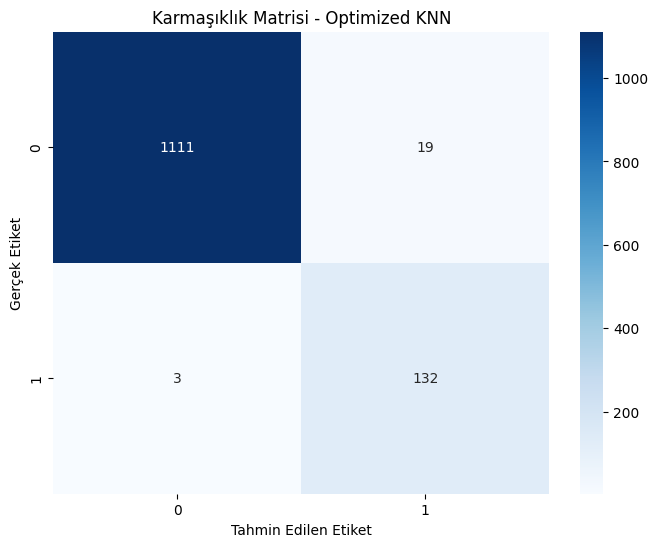


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1130
           1       0.87      0.98      0.92       135

    accuracy                           0.98      1265
   macro avg       0.94      0.98      0.96      1265
weighted avg       0.98      0.98      0.98      1265



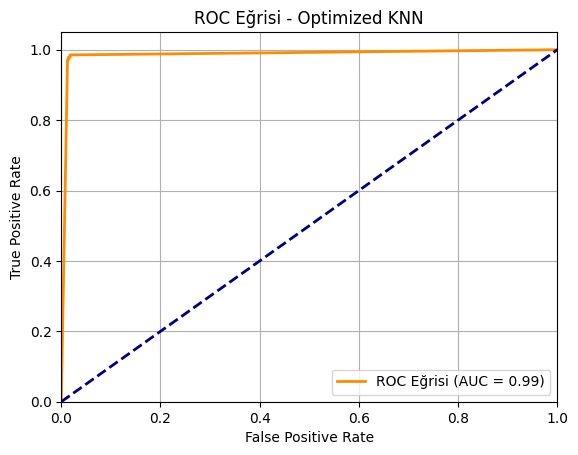

In [19]:
def optimize_model(model, param_grid, x_train, y_train, model_name):  # Model optimizasyon fonksiyonu tanımı
    print(f"\n{model_name} için GridSearchCV başlatılıyor...")  # Optimizasyon başlangıç mesajı
    grid_search = GridSearchCV(  # GridSearchCV nesnesi oluştur
        estimator=model,  # Optimize edilecek model
        param_grid=param_grid,  # Denenecek parametre aralığı
        cv=5,  # Çapraz doğrulama kat sayısı
        scoring='f1_weighted',  # Değerlendirme metriği (ağırlıklı F1 skoru)
        n_jobs=-1,  # Kullanılacak işlemci çekirdeği sayısı (-1 tümünü kullanır)
        verbose=1  # İşlem sırasında gösterilecek detay seviyesi
    )
    
    grid_search.fit(x_train, y_train)  # GridSearchCV'yi eğitim verileriyle çalıştır
    
    print(f"\n{model_name} için en iyi parametreler:")  # En iyi parametreler başlığı
    print(grid_search.best_params_)  # Bulunan en iyi parametreleri yazdır
    print(f"En iyi cross-validation skoru: {grid_search.best_score_:.4f}")  # En iyi çapraz doğrulama skorunu yazdır
    
    return grid_search.best_estimator_  # En iyi parametrelerle eğitilmiş modeli döndür

rf_param_grid = {  # Random Forest için denenecek parametreler ve değerleri
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

svm_param_grid = {  # SVM için denenecek parametreler ve değerleri
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

knn_param_grid = {  # KNN için denenecek parametreler ve değerleri
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

print("\nGridSearchCV ile model optimizasyonu başlıyor...")  # Genel optimizasyon başlangıç mesajı

best_rf = optimize_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train_bal, y_train_bal, 'Random Forest')  # Random Forest modelini optimize et
best_svm = optimize_model(SVC(random_state=42, probability=True), svm_param_grid, X_train_bal, y_train_bal, 'SVM')  # SVM modelini optimize et
best_knn = optimize_model(KNeighborsClassifier(), knn_param_grid, X_train_bal, y_train_bal, 'KNN')  # KNN modelini optimize et

rf_opt_results = evaluate_classification(best_rf, X_train_bal, X_test, y_train_bal, y_test, 'Optimized Random Forest')  # Optimize edilmiş RF modelini değerlendir
svm_opt_results = evaluate_classification(best_svm, X_train_bal, X_test, y_train_bal, y_test, 'Optimized SVM')  # Optimize edilmiş SVM modelini değerlendir
knn_opt_results = evaluate_classification(best_knn, X_train_bal, X_test, y_train_bal, y_test, 'Optimized KNN')  # Optimize edilmiş KNN modelini değerlendir

### 20. Optimize Model Değerlendirmesi
Optimize edilmiş modellerin performansını değerlendiriyoruz:
- GridSearchCV sonuçlarının uygulanması
- Test seti üzerinde değerlendirme
- Performans sonuçlarının raporlanması

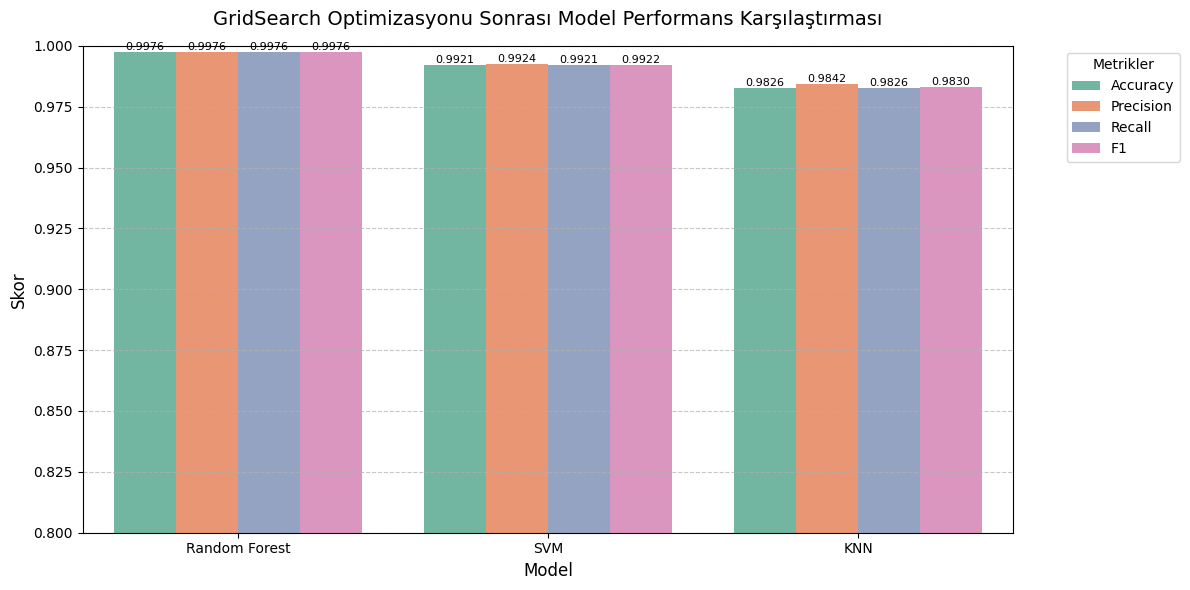

In [20]:
grid_data = {  # Görselleştirme için veri sözlüğü oluştur
    'Model': ['Random Forest', 'SVM', 'KNN'] * 4,  # Model isimleri (her metrik için tekrarlanır)
    'Metrik': ['Accuracy'] * 3 + ['Precision'] * 3 + ['Recall'] * 3 + ['F1'] * 3,  # Metrik isimleri
    'Değer': [  # İlgili metrik değerleri (optimize edilmiş modellerden)
        rf_opt_results[0], svm_opt_results[0], knn_opt_results[0],  # Doğruluk değerleri
        rf_opt_results[1], svm_opt_results[1], knn_opt_results[1],  # Kesinlik değerleri
        rf_opt_results[2], svm_opt_results[2], knn_opt_results[2],  # Duyarlılık değerleri
        rf_opt_results[3], svm_opt_results[3], knn_opt_results[3]   # F1 skoru değerleri
    ]
}

grid_df = pd.DataFrame(grid_data)  # Veri sözlüğünden Pandas DataFrame oluştur

plt.figure(figsize=(12, 6))  # Grafik figürünün boyutunu ayarla
sns.barplot(data=grid_df, x='Model', y='Değer', hue='Metrik', palette='Set2')  # Çubuk grafik çiz
plt.title('GridSearch Optimizasyonu Sonrası Model Performans Karşılaştırması', fontsize=14, pad=15)  # Grafiğe başlık ekle
plt.xlabel('Model', fontsize=12)  # X eksenine etiket ekle
plt.ylabel('Skor', fontsize=12)  # Y eksenine etiket ekle
plt.ylim(0.8, 1.0)  # Y ekseni sınırlarını ayarla
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y eksenine yatay ızgara çizgileri ekle
plt.legend(title='Metrikler', bbox_to_anchor=(1.05, 1), loc='upper left')  # Göstergeyi grafiğin dışına sağ üste yerleştir

for p in plt.gca().patches:  # Grafikteki her bir çubuk için döngü
    plt.gca().annotate(f'{p.get_height():.4f}',  # Çubuğun değerini formatlayarak yazdır
                       (p.get_x() + p.get_width() / 2., p.get_height()),  # Metnin konumu
                       ha='center', va='bottom', fontsize=8)  # Metni hizala ve font boyutunu ayarla

plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat

### 21. Performans Karşılaştırma Görselleştirmesi
Normal ve optimize modellerin performansını karşılaştırıyoruz:
- Veri yapısı hazırlama
- Karşılaştırmalı grafik tasarımı
- Değer etiketleme
- Görsel analiz

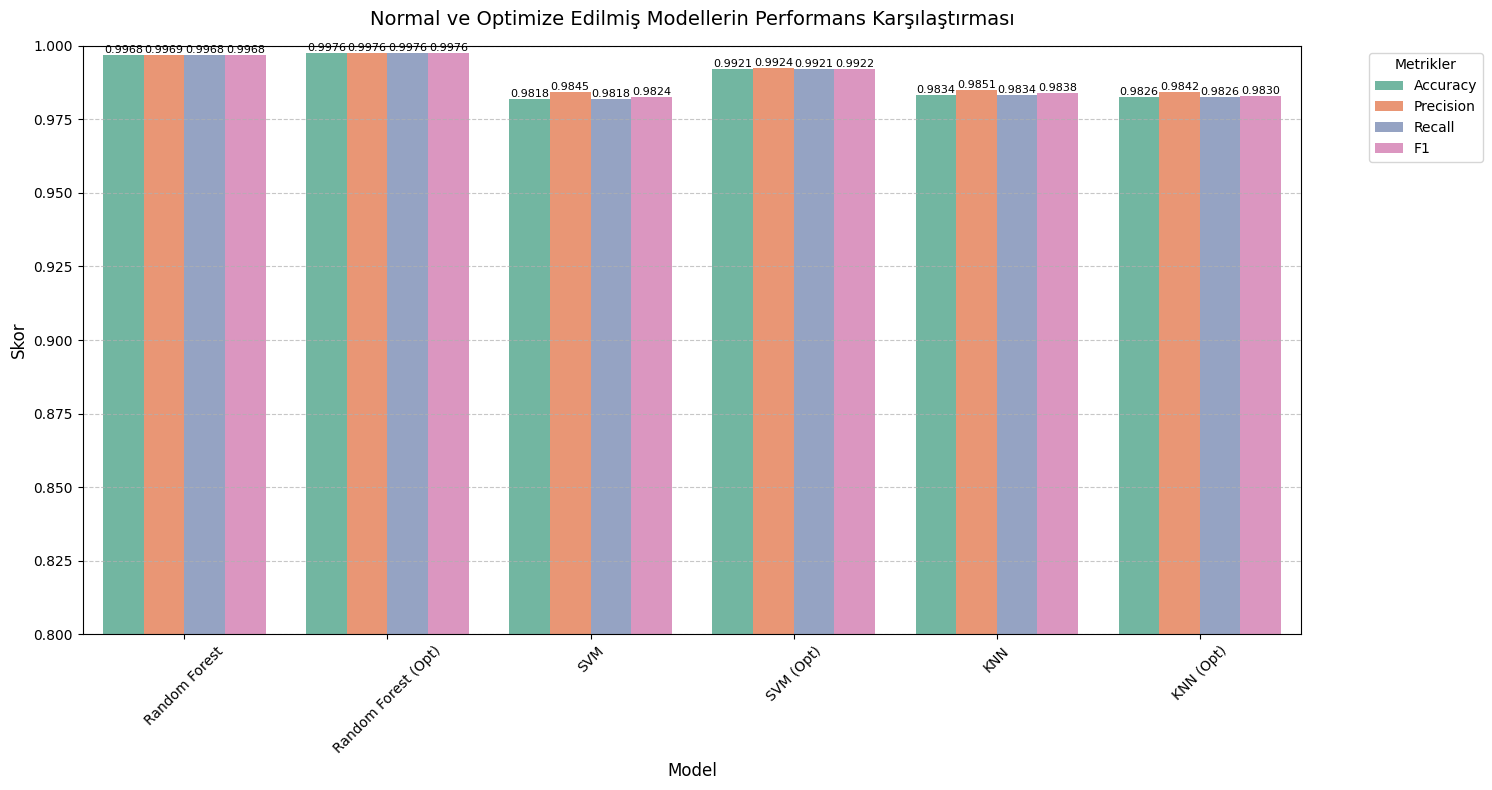

In [21]:
comparison_data = {  # Karşılaştırmalı görselleştirme için veri sözlüğü oluştur
    'Model': ['Random Forest', 'Random Forest (Opt)', 'SVM', 'SVM (Opt)', 'KNN', 'KNN (Opt)'] * 4,  # Normal ve optimize model isimleri
    'Metrik': ['Accuracy'] * 6 + ['Precision'] * 6 + ['Recall'] * 6 + ['F1'] * 6,  # Metrik isimleri
    'Değer': [  # İlgili metrik değerleri
        rf_results[0], rf_opt_results[0],  # RF Doğruluk (Normal, Optimize)
        svm_results[0], svm_opt_results[0],  # SVM Doğruluk (Normal, Optimize)
        knn_results[0], knn_opt_results[0],  # KNN Doğruluk (Normal, Optimize)
        rf_results[1], rf_opt_results[1],  # RF Kesinlik
        svm_results[1], svm_opt_results[1],  # SVM Kesinlik
        knn_results[1], knn_opt_results[1],  # KNN Kesinlik
        rf_results[2], rf_opt_results[2],  # RF Duyarlılık
        svm_results[2], svm_opt_results[2],  # SVM Duyarlılık
        knn_results[2], knn_opt_results[2],  # KNN Duyarlılık
        rf_results[3], rf_opt_results[3],  # RF F1 Skoru
        svm_results[3], svm_opt_results[3],  # SVM F1 Skoru
        knn_results[3], knn_opt_results[3]   # KNN F1 Skoru
    ]
}

comparison_df = pd.DataFrame(comparison_data)  # Veri sözlüğünden Pandas DataFrame oluştur

plt.figure(figsize=(15, 8))  # Grafik figürünün boyutunu ayarla
sns.barplot(data=comparison_df, x='Model', y='Değer', hue='Metrik', palette='Set2')  # Çubuk grafik çiz
plt.title('Normal ve Optimize Edilmiş Modellerin Performans Karşılaştırması', fontsize=14, pad=15)  # Grafiğe başlık ekle
plt.xlabel('Model', fontsize=12)  # X eksenine etiket ekle
plt.ylabel('Skor', fontsize=12)  # Y eksenine etiket ekle
plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndür
plt.ylim(0.8, 1.0)  # Y ekseni sınırlarını ayarla
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y eksenine yatay ızgara çizgileri ekle
plt.legend(title='Metrikler', bbox_to_anchor=(1.05, 1), loc='upper left')  # Göstergeyi grafiğin dışına sağ üste yerleştir

for p in plt.gca().patches:  # Grafikteki her bir çubuk için döngü
    plt.gca().annotate(f'{p.get_height():.4f}',  # Çubuğun değerini formatlayarak yazdır
                       (p.get_x() + p.get_width() / 2., p.get_height()),  # Metnin konumu
                       ha='center', va='bottom', fontsize=8)  # Metni hizala ve font boyutunu ayarla

plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat

### 22. ROC Eğrileri Analizi
Modellerin ikili sınıflandırma performansını analiz ediyoruz:
- ROC eğrilerinin çizimi
- AUC değerlerinin hesaplanması
- Karşılaştırmalı görselleştirme
- Performans değerlendirmesi


Normal Modeller için ROC Eğrileri:


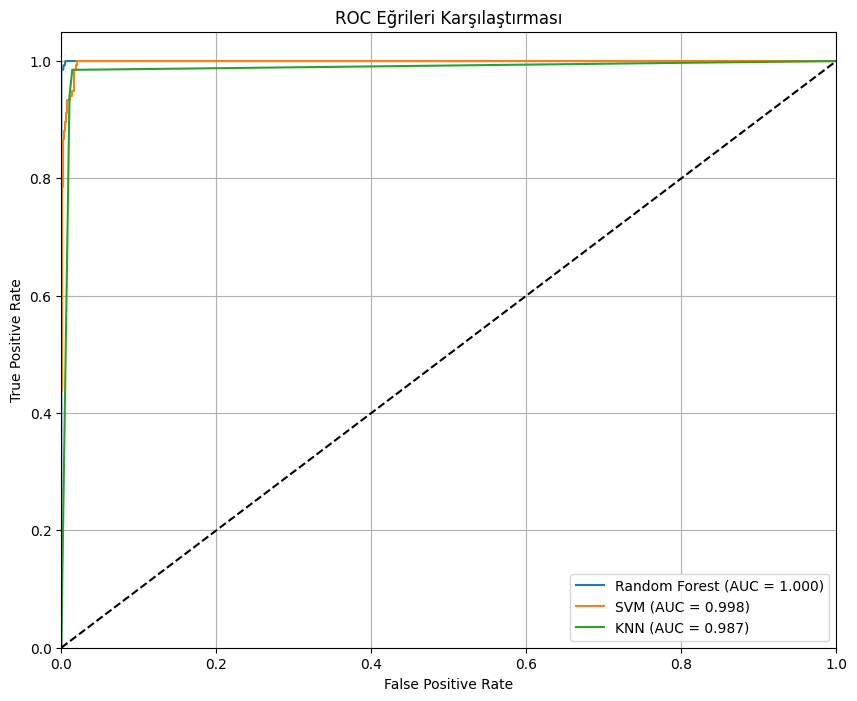


Optimize Edilmiş Modeller için ROC Eğrileri:


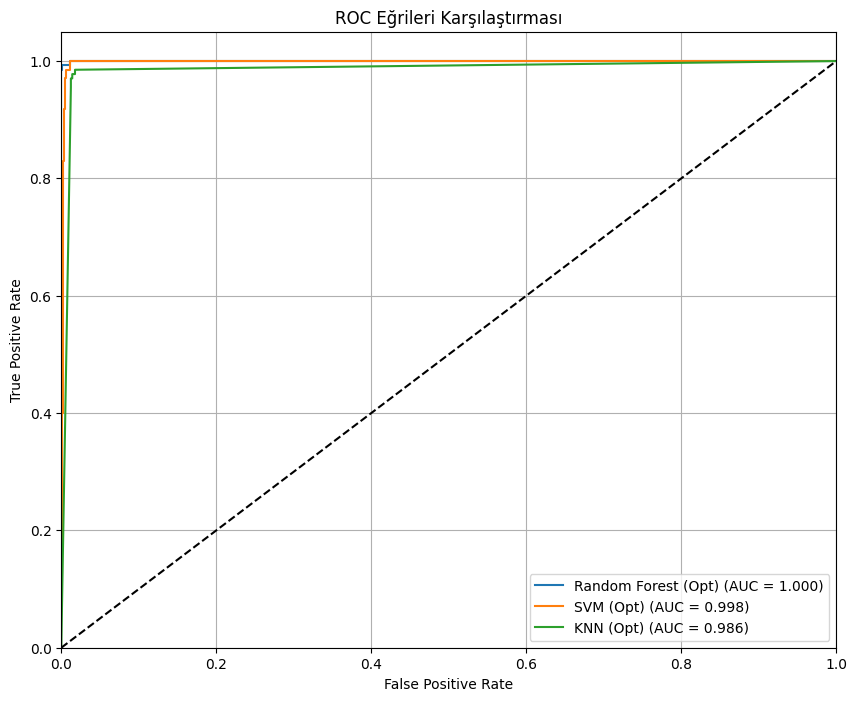


Tüm Modellerin ROC Eğrileri Karşılaştırması:


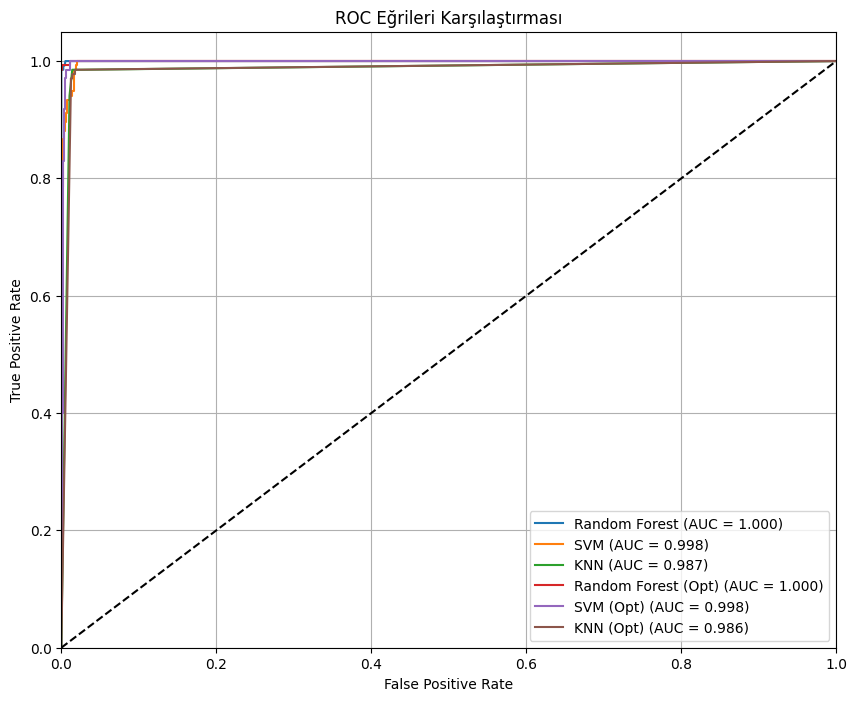

In [22]:
def plot_roc_curves(models, model_names, x_test, y_test):  # ROC eğrilerini çizen fonksiyon tanımı
    plt.figure(figsize=(10, 8))  # Grafik figürünün boyutunu ayarla
    
    for model, name in zip(models, model_names):  # Verilen her model ve ismi için döngü
        if hasattr(model, "predict_proba"):  # Modelin olasılık tahmini yapma yeteneği varsa
            y_score = model.predict_proba(x_test)[:, 1]  # Pozitif sınıf için olasılıkları al
        else:  # Modelin karar fonksiyonu varsa
            y_score = model.decision_function(x_test)  # Karar fonksiyonu skorlarını al
            
        fpr, tpr, _ = roc_curve(y_test, y_score)  # FPR ve TPR hesapla
        roc_auc = auc(fpr, tpr)  # AUC değerini hesapla
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')  # ROC eğrisini çiz ve AUC değerini etikete ekle
    
    plt.plot([0, 1], [0, 1], 'k--')  # Rastgele tahmin referans çizgisini ekle (siyah kesikli çizgi)
    plt.xlim([0.0, 1.0])  # X ekseni sınırlarını ayarla
    plt.ylim([0.0, 1.05])  # Y ekseni sınırlarını ayarla
    plt.xlabel('False Positive Rate')  # X eksenine etiket ekle
    plt.ylabel('True Positive Rate')  # Y eksenine etiket ekle
    plt.title('ROC Eğrileri Karşılaştırması')  # Grafiğe başlık ekle
    plt.legend(loc="lower right")  # Göstergeyi sağ alt köşeye yerleştir
    plt.grid(True)  # Grafiğe ızgara ekle
    plt.show()  # Grafiği göster
    plt.close() # Grafik figürünü kapat

print("\nNormal Modeller için ROC Eğrileri:")  # Başlık
normal_models = [rf_model, svm_model, knn_model]  # Normal modellerin listesi
normal_model_names = ['Random Forest', 'SVM', 'KNN']  # Normal model isimlerinin listesi
plot_roc_curves(normal_models, normal_model_names, X_test, y_test)  # Normal modeller için ROC eğrilerini çiz

print("\nOptimize Edilmiş Modeller için ROC Eğrileri:")  # Başlık
optimized_models = [best_rf, best_svm, best_knn]  # Optimize edilmiş modellerin listesi
optimized_model_names = ['Random Forest (Opt)', 'SVM (Opt)', 'KNN (Opt)']  # Optimize edilmiş model isimlerinin listesi
plot_roc_curves(optimized_models, optimized_model_names, X_test, y_test)  # Optimize edilmiş modeller için ROC eğrilerini çiz

print("\nTüm Modellerin ROC Eğrileri Karşılaştırması:")  # Başlık
all_models = normal_models + optimized_models  # Tüm modellerin birleştirilmiş listesi
all_model_names = normal_model_names + optimized_model_names  # Tüm model isimlerinin birleştirilmiş listesi
plot_roc_curves(all_models, all_model_names, X_test, y_test)  # Tüm modeller için ROC eğrilerini tek grafikte çiz

### 23. AUC Değerleri Analizi
ROC performansını sayısallaştırıyoruz:
- AUC değerlerinin hesaplanması
- Tablolu çıktı oluşturma
- Görsel karşılaştırma
- Performans değerlendirmesi


ROC Eğrilerinin AUC Değerleri:
                 Model     AUC
0        Random Forest  0.9999
1                  SVM  0.9980
2                  KNN  0.9868
3  Random Forest (Opt)  0.9999
4            SVM (Opt)  0.9979
5            KNN (Opt)  0.9861


C:\Users\Semih Temiz\AppData\Local\Temp\ipykernel_10292\2308364877.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=auc_df, x='Model', y='AUC', palette='Set2')  # AUC değerlerini çubuk grafik olarak çiz


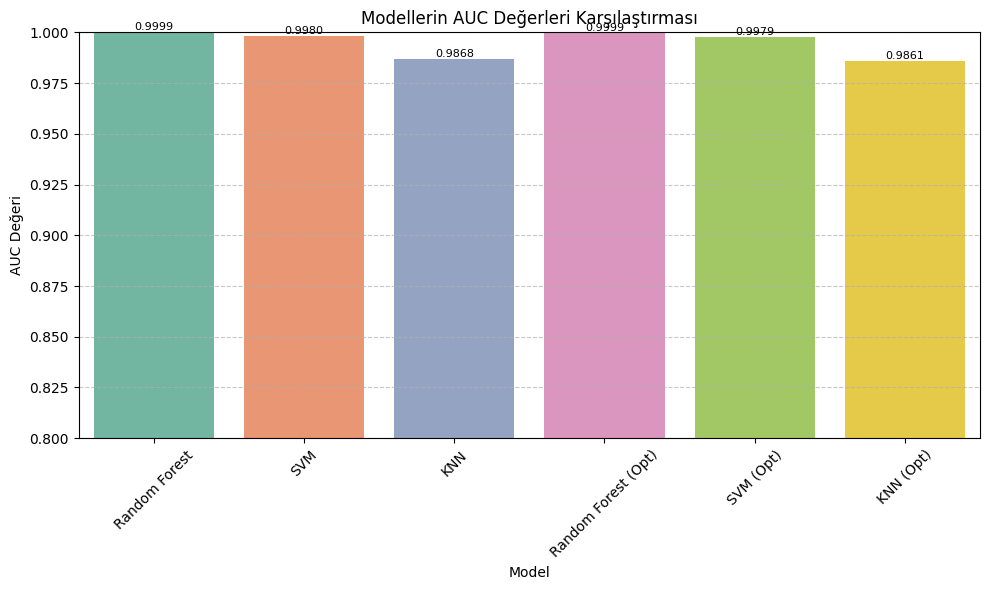

In [23]:
auc_values = []  # AUC değerlerini saklamak için boş bir liste oluştur
for model, name in zip(all_models, all_model_names):  # Tüm modeller ve isimleri için döngü
    if hasattr(model, "predict_proba"):  # Modelin olasılık tahmini yapma yeteneği varsa
        y_score = model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılıkları al
    else:  # Modelin karar fonksiyonu varsa
        y_score = model.decision_function(X_test)  # Karar fonksiyonu skorlarını al
    fpr, tpr, _ = roc_curve(y_test, y_score)  # FPR ve TPR hesapla
    auc_value = auc(fpr, tpr)  # AUC değerini hesapla
    auc_values.append({'Model': name, 'AUC': auc_value})  # Model adı ve AUC değerini sözlük olarak listeye ekle

auc_df = pd.DataFrame(auc_values)  # AUC değerleri listesinden Pandas DataFrame oluştur
print("\nROC Eğrilerinin AUC Değerleri:")  # Başlık
print(auc_df.round(4))  # AUC değerlerini içeren DataFrame'i 4 ondalık basamakla yazdır

plt.figure(figsize=(10, 6))  # Grafik figürünün boyutunu ayarla
sns.barplot(data=auc_df, x='Model', y='AUC', palette='Set2')  # AUC değerlerini çubuk grafik olarak çiz
plt.title('Modellerin AUC Değerleri Karşılaştırması')  # Grafiğe başlık ekle
plt.xlabel('Model')  # X eksenine etiket ekle
plt.ylabel('AUC Değeri')  # Y eksenine etiket ekle
plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndür
plt.ylim(0.8, 1.0)  # Y ekseni sınırlarını ayarla
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Y eksenine yatay ızgara çizgileri ekle

for p in plt.gca().patches:  # Grafikteki her bir çubuk için döngü
    plt.gca().annotate(f'{p.get_height():.4f}',  # Çubuğun değerini (AUC) formatlayarak yazdır
                       (p.get_x() + p.get_width() / 2., p.get_height()),  # Metnin konumu
                       ha='center', va='bottom', fontsize=8)  # Metni hizala ve font boyutunu ayarla

plt.tight_layout()  # Grafik elemanlarının düzgün yerleşmesini sağla
plt.show()  # Grafiği göster
plt.close() # Grafik figürünü kapat

### 24. Model Karşılaştırma ve İyileştirme Analizi
Tüm analiz sonuçlarını özetliyoruz:
- Performans metrikleri tablosu
- GridSearchCV iyileştirme analizi
- Yüzdelik değişim hesaplamaları
- Önemli çıkarımlar ve sonuçlar 

In [24]:
print("\nModel Karşılaştırma Sonuçları:")  # Başlık
print("=============================")  # Ayırıcı çizgi
comparison_table = comparison_df.pivot(index='Model', columns='Metrik', values='Değer')  # Karşılaştırma DataFrame'ini pivot tabloya dönüştür
print(comparison_table.round(4))  # Pivot tabloyu 4 ondalık basamakla yazdır

print("\nGridSearchCV ile Sağlanan İyileştirme Oranları:")  # Başlık
print("=============================================")  # Ayırıcı çizgi
for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:  # Her bir ana metrik için döngü
    print(f"\n{metric} İyileştirmeleri:")  # Metrik adı ile alt başlık
    for model in ['Random Forest', 'SVM', 'KNN']:  # Her bir model tipi için döngü
        normal_score = comparison_df[(comparison_df['Model'] == model) & 
                                      (comparison_df['Metrik'] == metric)]['Değer'].values[0]  # Modelin normal skorunu al
        opt_score = comparison_df[(comparison_df['Model'] == f"{model} (Opt)") & 
                                   (comparison_df['Metrik'] == metric)]['Değer'].values[0]  # Modelin optimize edilmiş skorunu al
        improvement = ((opt_score - normal_score) / normal_score) * 100 if normal_score != 0 else float('inf') # İyileştirme yüzdesini hesapla (0'a bölme hatasını kontrol et)
        print(f"{model}: {improvement:+.2f}%")  # Model ve iyileştirme yüzdesini yazdır (+ işareti ile pozitif/negatif göster)

print("\nAnaliz tamamlandı!")  # Analizin bittiğini belirten mesaj


Model Karşılaştırma Sonuçları:
Metrik               Accuracy      F1  Precision  Recall
Model                                                   
KNN                    0.9834  0.9838     0.9851  0.9834
KNN (Opt)              0.9826  0.9830     0.9842  0.9826
Random Forest          0.9968  0.9968     0.9969  0.9968
Random Forest (Opt)    0.9976  0.9976     0.9976  0.9976
SVM                    0.9818  0.9824     0.9845  0.9818
SVM (Opt)              0.9921  0.9922     0.9924  0.9921

GridSearchCV ile Sağlanan İyileştirme Oranları:

Accuracy İyileştirmeleri:
Random Forest: +0.08%
SVM: +1.05%
KNN: -0.08%

Precision İyileştirmeleri:
Random Forest: +0.08%
SVM: +0.80%
KNN: -0.09%

Recall İyileştirmeleri:
Random Forest: +0.08%
SVM: +1.05%
KNN: -0.08%

F1 İyileştirmeleri:
Random Forest: +0.08%
SVM: +0.99%
KNN: -0.08%

Analiz tamamlandı!
